In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# laod dataset
df = pd.read_csv('CreditDataset.csv')

# Menampilkan 5 baris teratas
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [4]:
# --------------------------------------------
# Preprocessing Data
# --------------------------------------------

# Mengubah kolom bertipe object menjadi numerik dengan Label Encoding
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Class'])  # 'Class' adalah target
y = df['Class']

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data latih dan uji (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
#--------------------------------------------
# Membuat dan Melatih Model SVM Regression
# --------------------------------------------

# Membuat model SVR
svr_model = SVR(kernel='rbf')  # Anda dapat mengganti kernel: 'linear', 'poly', dll.

# Melatih model pada data latih
svr_model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = svr_model.predict(X_test)


In [6]:
# --------------------------------------------
# Fungsi Regression Report
# --------------------------------------------
def regression_report(y_true, y_pred):
    """
    Fungsi untuk menghasilkan laporan regresi dengan berbagai metrik evaluasi.

    Parameters:
    - y_true: array-like, nilai target sebenarnya.
    - y_pred: array-like, nilai prediksi model.

    Returns:
    - None, hanya mencetak hasil evaluasi.
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # RMSE adalah akar dari MSE
    r2 = r2_score(y_true, y_pred)

    print("Regression Report:")
    print("===================")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2 Score): {r2:.4f}")

# --------------------------------------------
# Evaluasi Model dan Regression Report
# --------------------------------------------
regression_report(y_test, y_pred)


Regression Report:
Mean Absolute Error (MAE): 0.2946
Mean Squared Error (MSE): 0.1544
Root Mean Squared Error (RMSE): 0.3929
R-squared (R2 Score): 0.2577


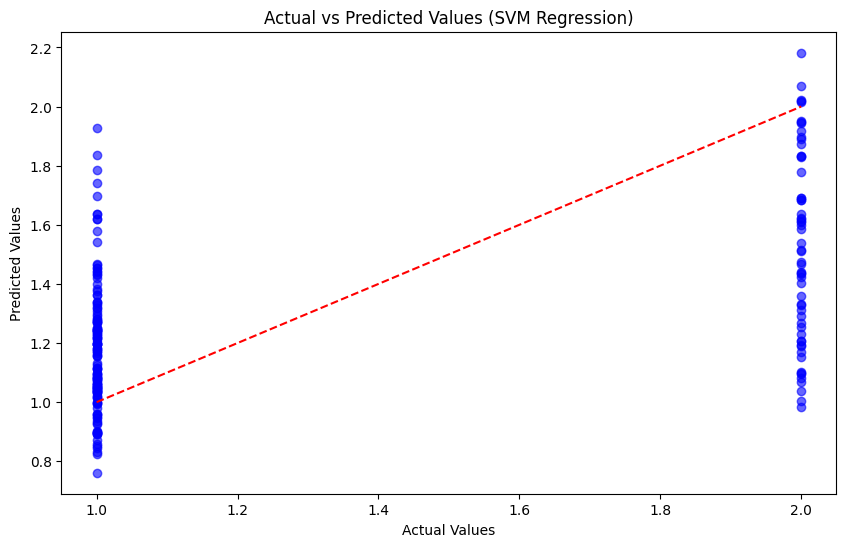

In [7]:
# --------------------------------------------
# Visualisasi Hasil Prediksi
# --------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (SVM Regression)")
plt.show()